In [35]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.datahandlers import GalaxyDataHandler, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, plot_cosinor, plot_sleep_predictions, plot_non_wear

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
reload_galaxy = False

In [37]:
preprocess_args = {
    'rescale_factor': 1/(10),
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

In [38]:
if reload_galaxy:
    galaxy_handler = GalaxyDataHandler(galaxy_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_handler.pkl", "wb") as file:
        pickle.dump(galaxy_handler, file)
else:
    with open("pickle/galaxy_handler.pkl", "rb") as file:
        galaxy_handler = pickle.load(file)

In [39]:
galaxy_handler.get_meta_data()

{'datasource': 'samsung galaxy smartwatch',
 'raw_n_datapoints': 12537000,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_frequency': 'irregular (~25Hz)',
 'raw_datatype': 'accelerometer',
 'calibration_offset': array([-0.01739324,  0.00449154, -0.00464635]),
 'calibration_scale': array([0.99252398, 0.99404835, 0.989714  ]),
 'total_time': 431999.96,
 'wear_time': 405619.60000000003,
 'non-wear_time': 26380.359999999986}

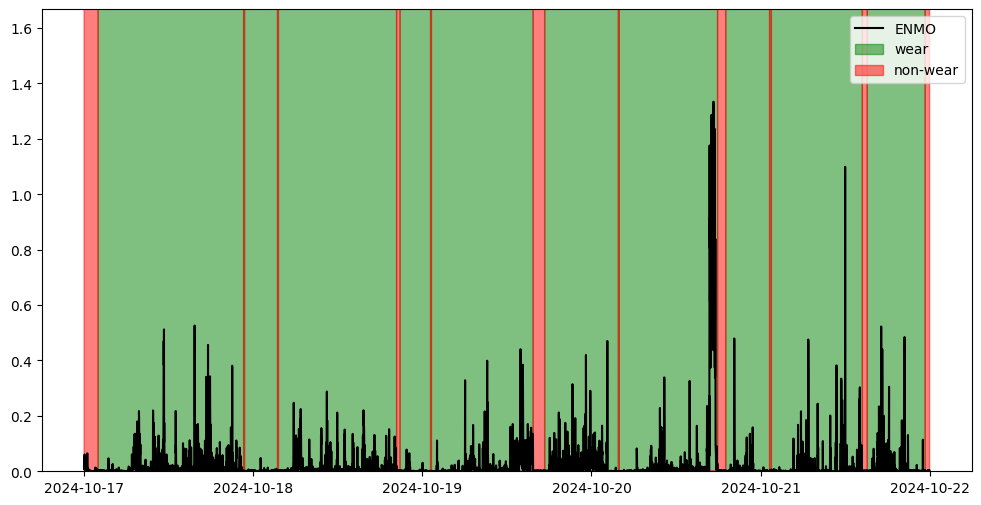

In [40]:
plot_enmo(galaxy_handler)

In [41]:
features_args = {
    'sleep_ck_sf': 0.005,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 50,
    'pa_cutpoint_lm': 150,
    'pa_cutpoint_mv': 300,
}

In [42]:
features = WearableFeatures(galaxy_handler, features_args)

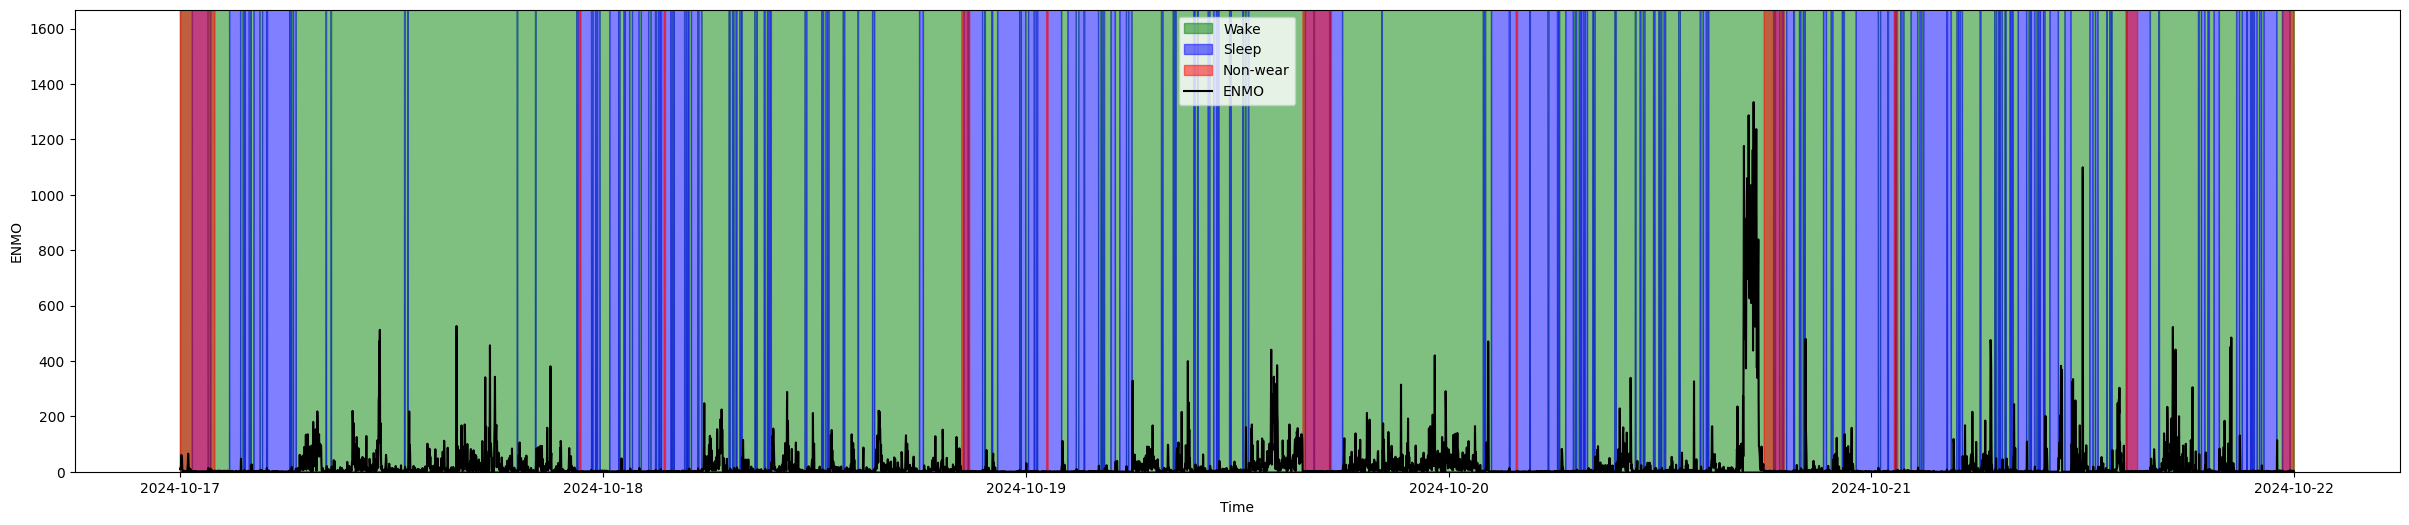

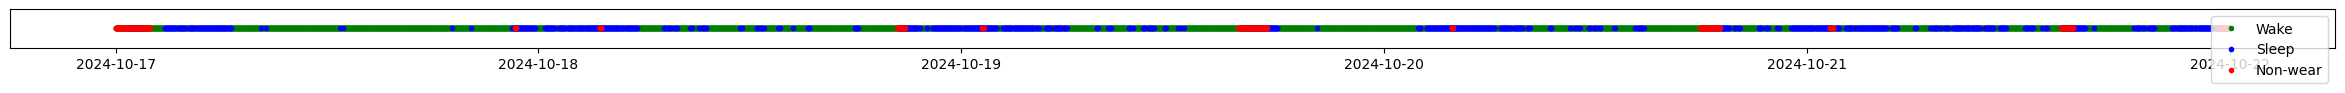

In [43]:
plot_sleep_predictions(features, simple=False)
plot_sleep_predictions(features, simple=True)

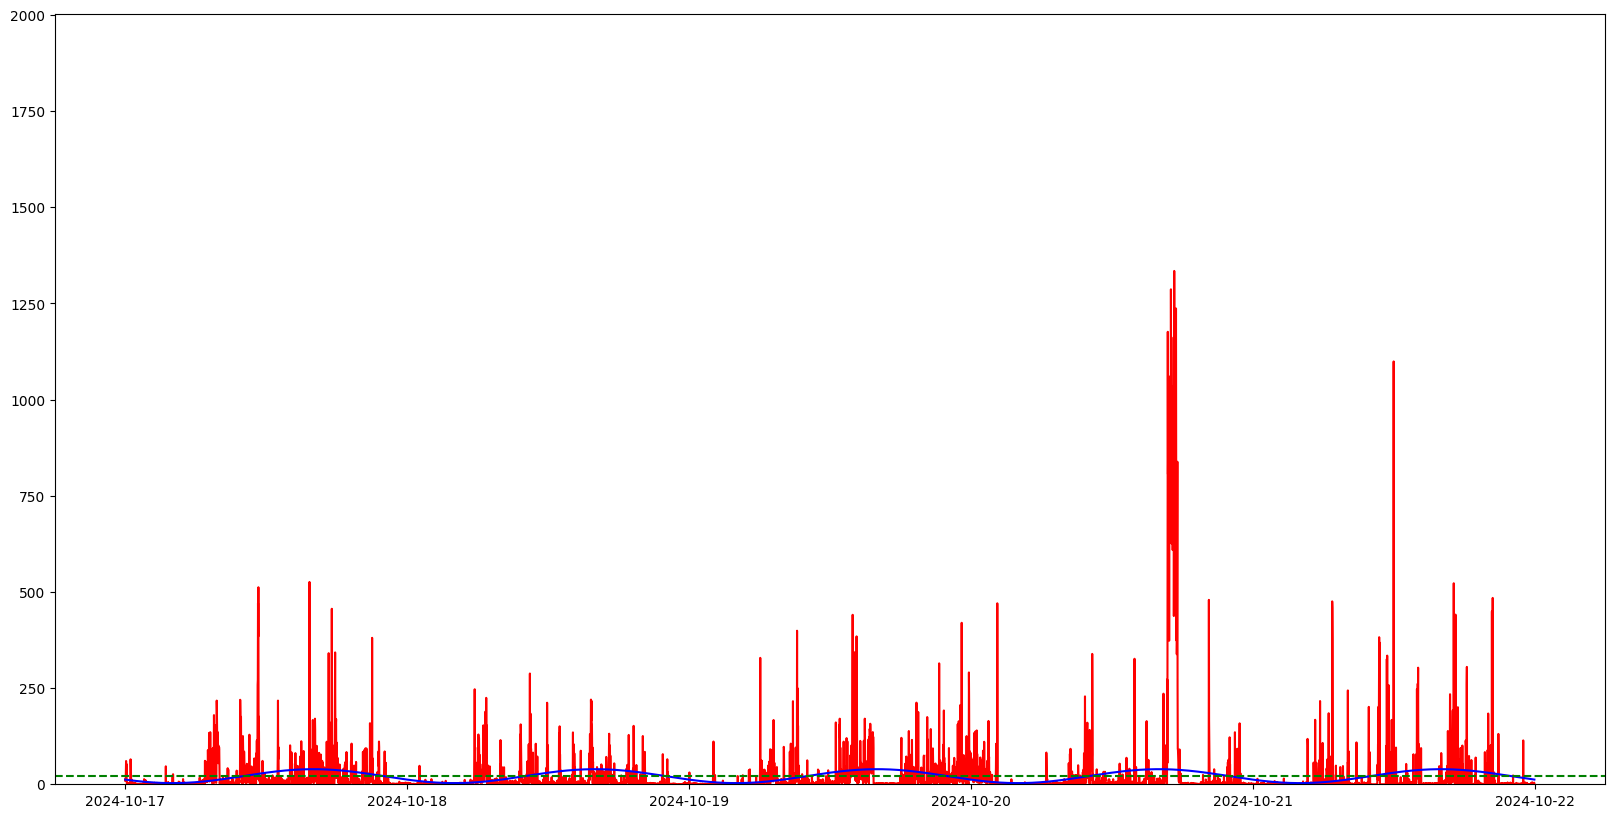

In [44]:
plot_cosinor(features)

In [45]:
features.get_features()['cosinor']

{'MESOR': 21.142531206755883,
 'amplitude': 18.104271299888573,
 'acrophase': 4.19672913482371,
 'acrophase_time': 961.8194687399521}

In [46]:
features.get_features()['nonparam']

{'IS': 0.2522832067585525,
 'IV': 1.3459378031892661,
 'M10': [28.133231964921386,
  19.24913187258061,
  32.62142104912912,
  80.88845733746057,
  28.31722383628204],
 'M10_start': [Timestamp('2024-10-17 09:41:00'),
  Timestamp('2024-10-18 05:45:00'),
  Timestamp('2024-10-19 13:55:00'),
  Timestamp('2024-10-20 08:18:00'),
  Timestamp('2024-10-21 10:36:00')],
 'L5': [1.8948282394673086,
  1.8352675088179202,
  2.068071645997659,
  2.031877283738411,
  2.0175939524351683],
 'L5_start': [Timestamp('2024-10-17 01:10:00'),
  Timestamp('2024-10-18 00:19:00'),
  Timestamp('2024-10-19 00:03:00'),
  Timestamp('2024-10-20 02:17:00'),
  Timestamp('2024-10-21 00:03:00')],
 'RA': [0.8737961608861852,
  0.8259122799165847,
  0.8807666826278964,
  0.9509920626099608,
  0.86697833713802]}

In [47]:
features.get_features()['physical_activity']

{'sedentary': [1411, 1421, 1404, 1373, 1403],
 'light': [27, 19, 36, 22, 35],
 'moderate': [2, 0, 0, 35, 1],
 'vigorous': [0, 0, 0, 10, 1]}

In [48]:
features.get_features()['sleep']

{'TST': [320, 485, 435, 473, 654],
 'WASO': [1069, 932, 770, 850, 771],
 'PTA': [22.222, 33.681, 30.208, 32.847, 45.417],
 'NWB': [22, 45, 31, 42, 49],
 'SOL': [40, 22, 8, 117, 0],
 'SRI': -1.2647671994440515,
 'SRI_flag': 'negative SRI - very low sleep consistency'}